# Data Analysis Assignment

**Importing necessary libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

**Loading the data**

In [4]:
data = pd.read_csv(r'C:\Users\prashant kumar\Desktop\Sample_Data.csv')

**Converting the Timestamp column to datetime for easier processing**

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

**Plotting the initial chart**

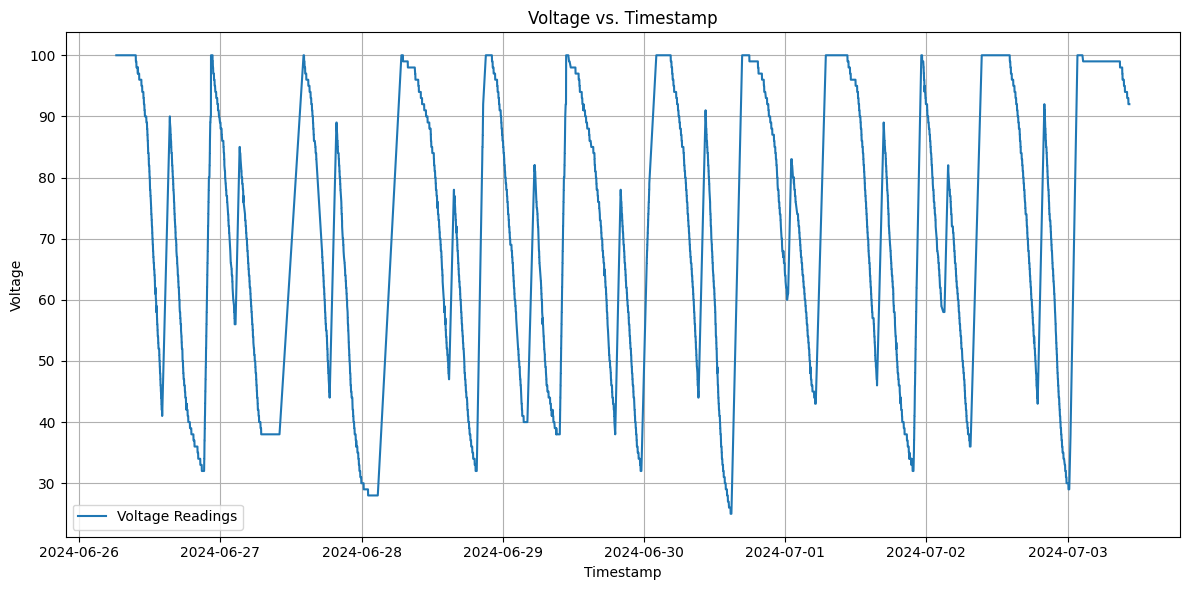

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['Values'], label="Voltage Readings")
plt.title("Voltage vs. Timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Compute 5-period moving average**

In [20]:
data['Moving_Average'] = data['Values'].rolling(window=5).mean()

**Find local peaks and lows**

In [21]:
peaks, _ = find_peaks(data['Values'])
troughs, _ = find_peaks(-data['Values'])

**Plot with moving average, peaks, and troughs**

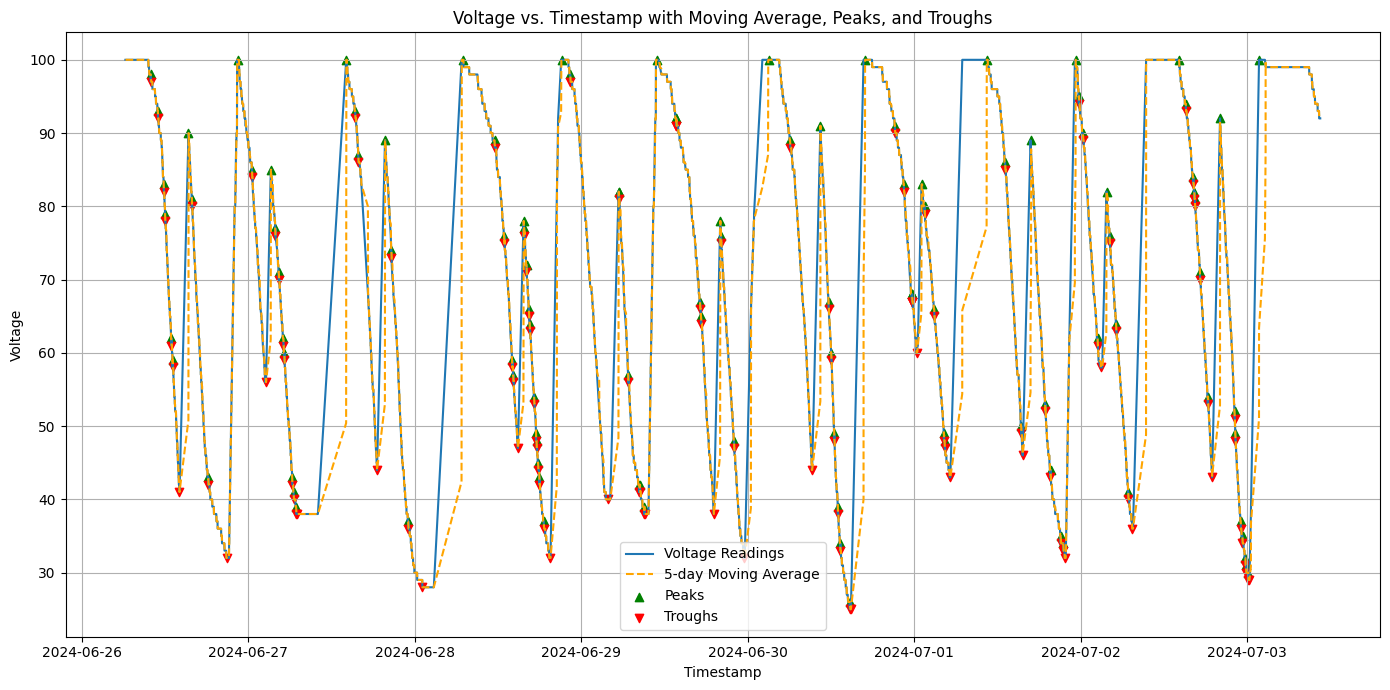

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(data['Timestamp'], data['Values'], label="Voltage Readings")
plt.plot(data['Timestamp'], data['Moving_Average'], linestyle='--', color='orange', label="5-day Moving Average")
plt.scatter(data['Timestamp'].iloc[peaks], data['Values'].iloc[peaks], marker='^', color='green', label='Peaks')
plt.scatter(data['Timestamp'].iloc[troughs], data['Values'].iloc[troughs], marker='v', color='red', label='Troughs')
plt.title("Voltage vs. Timestamp with Moving Average, Peaks, and Troughs")
plt.xlabel("Timestamp")
plt.ylabel("Voltage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Tabulating instances where voltage went below 20**

In [15]:
below_20_instances = data[data['Values'] < 20][['Timestamp', 'Values']]
print("Instances where Voltage went below 20:")
print(below_20_instances)

Instances where Voltage went below 20:
Empty DataFrame
Columns: [Timestamp, Values]
Index: []


**Bonus point : Detect downward slope accelerations (difference between consecutive slopes)**

In [16]:
data['Slope'] = data['Values'].diff()
data['Slope_Change'] = data['Slope'].diff()
downward_accelerations = data[(data['Slope'] < 0) & (data['Slope_Change'] < 0)][['Timestamp', 'Slope', 'Slope_Change']]

print("Downward slope acceleration instances:")
print(downward_accelerations)

Downward slope acceleration instances:
                Timestamp  Slope  Slope_Change
36    2024-06-26 09:36:30   -1.0          -1.0
60    2024-06-26 09:42:33   -1.0          -1.0
120   2024-06-26 09:57:38   -1.0          -1.0
125   2024-06-26 09:58:47   -1.0          -1.0
174   2024-06-26 10:11:06   -1.0          -1.0
...                   ...    ...           ...
21687 2024-07-03 09:21:12   -1.0          -1.0
21732 2024-07-03 09:34:56   -1.0          -1.0
21769 2024-07-03 09:44:50   -1.0          -1.0
21831 2024-07-03 10:07:38   -1.0          -1.0
21877 2024-07-03 10:20:17   -1.0          -1.0

[1187 rows x 3 columns]


**Saving the results to CSV files**

In [17]:
below_20_instances.to_csv("Voltage_Below_20_Instances.csv", index=False)
downward_accelerations.to_csv("Downward_Accelerations.csv", index=False)

## Breif Explaination of Assignment

1: Firstly we are Importing the necessary libraries for data visulization and interpretation. 
libraries used:- **pandas** - For reading and manipulating the data. **matplotlib.pyplot** - To create plots for data visualization. **scipy.signal.find_peaks** - Used to find local peaks and troughs in the data.

2: Then loading the data set provided by the company

3:Converting the Timestamp column to datetime format for easier plotting and time-based operations.

4:Then representing initial plot of voltage(value) vs timestamp and as instruction provided by the company taking voltage on y axis and timestamp on x axis.

5:Computing a moving average with a window size of 5 to smooth the data and reduce short-term fluctuations.

6:Identifying local peaks where the voltage readings increase and then decrease and Finding troughs by negating the values and applying the same method.

7:Plotting voltage readings, the 5-period moving average, and highlights peaks and troughs using scatter markers.

8:Filters the data to find rows where voltage values are less than 20. Displays these instances. 
But in our case the voltage value never went below 20 so the output would be **empty dataframe**.

9:For the Downward slope acceleration i Calculated the difference between consecutive voltage values to compute slopes and then Detecting downward slope accelerations by checking where both the slope and the change in slope are negative.

10:Saving the filtered voltage instances below 20 and downward acceleration instances to separate CSV files.

**Bonus point : Hosting the python code on hosting server**

Github link: (https://github.com/prashant31096/greencell-internship-assignment)